In [1]:
import fastai
from fastai.text.all import *
from pathlib import Path
import os
import numpy as np
from PIL import Image
import re
import torch
torch.cuda.set_device(0)

print(f"Fastai version: {fastai.__version__}")

Fastai version: 2.5.3


In [2]:
def tokens_to_image(tokens):
    img_array = np.zeros((len(tokens[0]), len(tokens)), dtype=np.uint8)
    for j, column in enumerate(tokens):
        for i, char in enumerate(column[:len(tokens[0])]):
            img_array[i, j] = (1-int(char)) * 255
    img = Image.fromarray(img_array)
    return img

In [3]:
# TEXT_FILES_DIR = Path('/home/macosta/ttmp/primus-txt/')
TEXT_FILES_DIR = Path('/home/macosta/ttmp/primus-cropped-txt/')

In [5]:
whitespace_tokenizer = BaseTokenizer()

In [4]:
class StafflineTokenizer():
    def __init__(self, staffline_pattern):
        self.staffline_pattern = staffline_pattern
    def __call__(self, items):
        return (self.tokenize_item(x) for x in items)
    def tokenize_item(self, item):
        if item[-1] != ' ':
            item += ' '
        abridged = self.staffline_pattern.sub("x", item)
        abridged = 'x'.join([x.strip() for x in abridged.split('x')])
#         print(abridged)
        abridged = re.sub(' +', '_', abridged)
        final = re.sub('x', ' ', abridged)
        return final.split()

In [5]:
STAFFLINE_A = "0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000"
STAFFLINE_B = "0000000000000000000000000000000000000000000000000001000000000000000001000000000000000001000000000000000001000000000000000001000000000000000000000000000000000000000000000000000"
STAFFLINE_PATTERN = re.compile(f"(({STAFFLINE_A}|{STAFFLINE_B}) )+")
staffline_tokenizer = StafflineTokenizer(staffline_pattern=STAFFLINE_PATTERN)


In [44]:
text = """
0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100001111111111111100000000000000011100000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111110000000000000011100000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111100000000000011100000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000011100000000000000011100000000000000111111111111111111111111111000000000011100000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000011100000000000000011100000000000011111111111111111111111111111100000000011100000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000011100000000000000011100000000000111111111111111111111111111111111000000011100000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000
"""
texts = [text.replace('\n', ' ').strip()]

In [46]:
for x in staffline_tokenizer(texts):
    print(x)

['0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100001111111111111100000000000000011100000000000000000000000000000000000000000000000000_0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111110000000000000011100000000000000000000000000000000000000000000000000_0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111100000000000011100000000000000000000000000000000000000000000000000', '0000000000000000000000000000000000000000000000000011100000000000000011100000000000000111111111111111111111111111000000000011100000000000000000000000000000000000000000000000000_0000000000000000000000000000000000000000000000000011100000000000000011100000000000011111111111111111111111111111100000000011100000000000000000000000000000000000000000000000000_0000000000000000000000000000000000000000000000000011100000000000000011100000000000111111111111111111111111111111111

In [6]:
data_loader = TextDataLoaders.from_folder(
    path=str(TEXT_FILES_DIR), 
    is_lm=True, valid_pct=0.1, 
    tok_tfm=staffline_tokenizer)

In Tokenizer: <__main__.StafflineTokenizer object at 0x7f6d0a3b6ed0>, rules: []
In tokenize_folder, <__main__.StafflineTokenizer object at 0x7f6d0a3b6ed0>, rules: []
In _tokenize_files: <__main__.StafflineTokenizer object at 0x7f6d0a3b6ed0>
Rules in _tokenize_files: []
In parallel_tokenize: rules: [functools.partial(<function Path.read_text at 0x7f6e7bd88dd0>, encoding='utf8')], tok: <__main__.StafflineTokenizer object at 0x7f6d0a3b6ed0>


In [48]:
data_loader.show_batch(max_n=1)

In [49]:
learn = language_model_learner(
    data_loader, 
    AWD_LSTM, 
    metrics=[accuracy, Perplexity()], 
    path=str(TEXT_FILES_DIR), 
    pretrained=False,
    wd=0.1).to_fp16()

In [50]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,6.806529,6.778901,0.148033,879.101746,01:43


In [51]:
learn.unfreeze()
learn.fit_one_cycle(10, 1e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,6.346257,6.211653,0.211440,498.524750,01:40
1,5.800145,5.670886,0.247250,290.291626,01:43
2,5.078220,4.901654,0.265257,134.512054,01:42
3,4.617967,4.491082,0.282380,89.217903,01:39
4,4.379453,4.277046,0.288342,72.027374,01:42
5,4.133446,4.055744,0.298983,57.728081,01:40
6,3.981280,3.940473,0.306264,51.442909,01:42
7,3.890198,3.877109,0.309639,48.284412,01:44
8,3.859837,3.851351,0.311772,47.056595,01:38
9,3.823531,3.846721,0.312011,46.839222,01:41


In [52]:
learn.save('lstm-delim')

Path('/home/macosta/ttmp/primus-cropped-txt/models/lstm-delim.pth')

In [7]:
learn = language_model_learner(
    data_loader, 
    AWD_LSTM, 
    metrics=[accuracy, Perplexity()], 
    path=str(TEXT_FILES_DIR), 
    pretrained=False,
    wd=0.1).to_fp16()
learn = learn.load('lstm-delim')

In [8]:
learn

In [53]:
SEED = """
0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100001111111111111100000000000000011100000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100001111111111111100000000000000011100000000000000000000000000000000000000000000000000 
0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111110000000000000011100000000000000000000000000000000000000000000000000 
0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111100000000000011100000000000000000000000000000000000000000000000000 
0000000000000000000000000000000000000000000000000011100000000000000011100000000000000111111111111111111111111111000000000011100000000000000000000000000000000000000000000000000 
0000000000000000000000000000000000000000000000000011100000000000000011100000000000011111111111111111111111111111100000000011100000000000000000000000000000000000000000000000000 
0000000000000000000000000000000000000000000000000011100000000000000011100000000000111111111111111111111111111111111000000011100000000000000000000000000000000000000000000000000 
0000000000000000000000000000000000000000000000000011100000000000000011100000000011111111111111111100000011101111111100000011100000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000011100000000000000011100000000111111111111111100000000011100001111110000011100000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000011100000000000000011100000001111111111111110000000000011100000111111000011100000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000011100000000000000011100000111111111111111000000000000011100000001111000011100000000000000111000000000000000000000000000000000
0000000000000000000000000000000000000000000000000011100000000000000011100001111111111111110000000000000011100000000111100011100000000000111111111100000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100011111111111111100000000000000011100000000011110011100000000001111111111110000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100111111111111111100000000000000011100000000011110011100000000011111111111111100000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011101111111111111111100000000000000011100000000001111011100000000111111111111111110000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011111111111111111011100000000000111111100000000000111011100000000111111111111111110000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011111111111111110011100000001111111111110000000000111011100000001111111111111111111000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011111111111111100011100000011111111111111100000000011111100000001111111111111111111000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011111111111111000011100001111111111111111110000000011111100000001111111111111110111100000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011111111111110000011100011111111111111111111000000011111100000001111111111111110011100000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000111111111111100000011100111111111111111111111100000001111100000000111111111111110011100000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000001111111111111000000011101111111111110011100011110000001111100000000111111111111100011100000000000000000000000 0000000000000000000000000000000000000000000011111111111111111000011111111111110000000011111111111111000011100001110000001111100000000011111111111000001100000000000000000000000 0000000000000000000000000000000000000000111111111111111111111111111111111111110000000011111111111110000011100000111000001111100000000001111111111000001100000000000000000000000 0000000000000000000000000000000000000111111111111111111111111111111111111111100000000011111111111110000011100000011000001111100000000000111111100000001100000000000000000000000 0000000000000000000000000000000000011111111111111111100000011111111111111111100000000011111111111100000011100000011000001111100000000000000000000000001100000000000000000000000 0000000000000000000000000000000001111111111111100011100000000011111111111111111111110011111111111100000011100000001000001111100000000000000000000000011100000000000000000000000 0000000000000000000000000000000111111111111100000011100000000011111111111111111111111111111111111000000011100000000000001111100000000000000000000000011100000000000000000000000 0000000000000000000000000000001111111111110000000011100000000111111111111100111111111111111111111000000011100000000000001111100000000000000000000000011100000000000000000000000 0000000000000000000000000000011111111111100000000011100000001111111111111000000000111111111111111111110011100000000000001111100000000000000000000000011100000000000000000000000 0000000000000000000000000000111111111110000000000011100000011111111111110000000000000011111111111111111111110000000000001111100000000000000000000000111000000000000000000000000 0000000000000000000000000001111111111110000000000011100000111111111111100000000000000011111111111111111111111111110000001111100000000000000000000001111000000000000000000000000 0000000000000000000000000011111111111100000000000011100001111111111111100000000000000011111111111000111111111111111111111111100000000000000000000011110000000000000000000000000 0000000000000000000000000011111111111000000000000011100011111111111111100000000000000011111111111000000011111111111111111111100000000000000000000111110000000000000000000000000 0000000000000000000000000011111111111000000000000011101111111111111011100000000000000011111111111000000011100000111111111111111111100000000000011111100000000000000000000000000 0000000000000000000000000001111111111000000000000011111111111111110011100000000000000011111111111000000011100000000001111111111111111111111111111111000000000000000000000000000 0000000000000000000000000000111111111100000000000011111111111111100011100000000000000011111111111100000011100000000000111111111111111111111111111100000000000000000000000000000 0000000000000000000000000000011111111100000000000011111111111110000011100000000000000011111111111100000011100000000000111011100001111111111111110000000000000000000000000000000 0000000000000000000000000000000111111111000000011111111111111000000011100000000000000011111111111110000011100000000001111011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000001111111111111111111111111100000000011100000000000000011111111111111000011100000000001110011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000011111111111111111111110000000000011100000000000000011111111111111100011100000000111110011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000001111111111111100000000000000011100000000000000011111111111111110011100000001111100011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011101111111111111111100000111111100011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100111111111111111111111111111000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100011111111111111111111111110000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100001111111111111111111111100000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000111111111111111111110000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000001111111111111111100000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000011111111111100000000000011100000000000000000000000000000000000000000000000000
"""

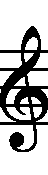

In [80]:
SEED = SEED.replace('\n', ' ').strip()
seed_tokens = SEED.split()
seed_img = tokens_to_image(seed_tokens)
seed_img.show()
pred = learn.predict(SEED, 50, temperature=.8, no_unk=True)

In [78]:
def decode_staff_predictions(pred):
    pred = re.sub(' ', f"{STAFFLINE} " * 50, pred)
    pred = re.sub('_', ' ', pred)
    pred = re.sub(' +', ' ', pred)
    return pred.strip()

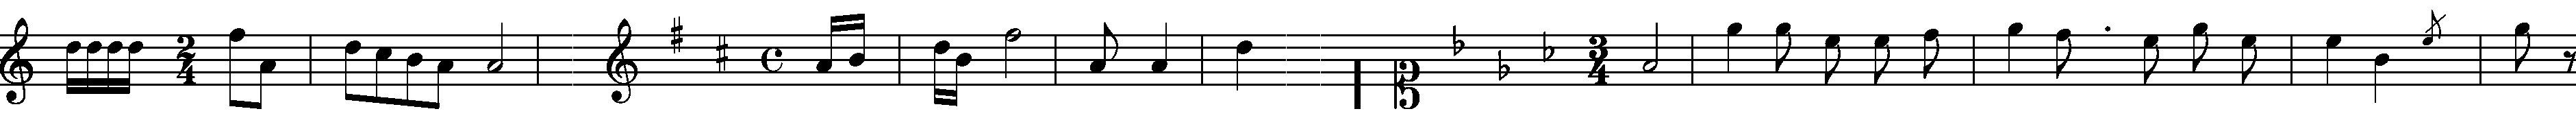

In [81]:
decoded = decode_staff_predictions(pred)
tokens = decoded.split()
tokens = [t for t in tokens if t != 'xxunk']
img = tokens_to_image(tokens)
img.show()

In [45]:
def beam_search(learn, seed_tokens, length=10, n_branches=5):
    branches = []
    depth = 0
    while depth < length:
        input_tensor = torch.tensor([seed_tokens])
        input_tensor.to(0)
        preds = learn.model(input_tensor)[0][0][-1]
        print(preds.shape)
        raise Exception()
        top_branches = preds.top_k(n_branches)
        for branch in top_branches:
            new_branches.append(branch)
        

In [46]:
len(data_loader.vocab)

28688

In [47]:
beam_search(learn, seed_tokens=[6, 75, 271, 421, 160, 10, 53, 103, 100, 5])

torch.Size([28688])


Exception: 